# Testing

* Integer mapping from the period of the PRNG to a specified interval $[x_{min}, x_{max}]$
  * Is it biased?

* Reservoir algorithms
  * Do they work?
  * How fast are they 
     


In [77]:
import gfort2py as gf
import os
import numpy as np
import matplotlib.pyplot as plt

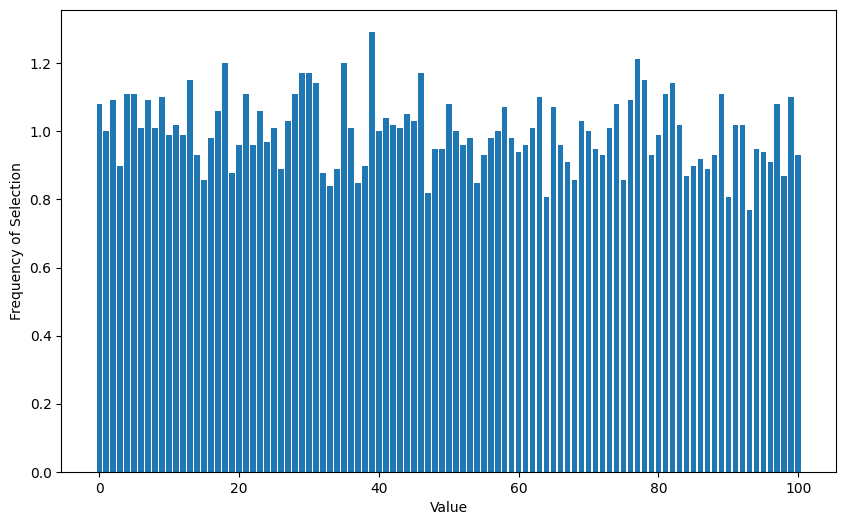

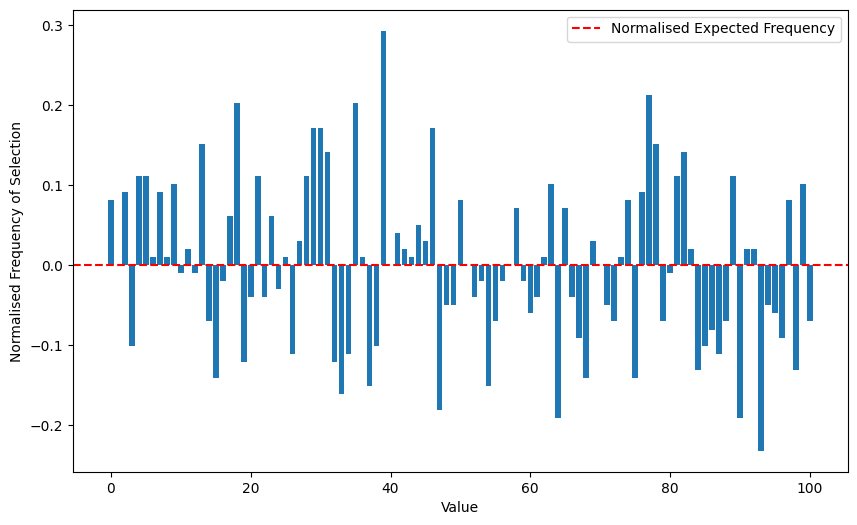

In [82]:
""" Test integer mapping
"""
integer_mapping_m = gf.fFort('../cmake-build/libisdff90.dylib', '../cmake-build/modules/integer_mapping_m.mod')

x_min = 0
x_max = 100
n_numbers = x_max - x_min + 1
n_repeat = 10000

random_numbers = np.zeros(shape=n_numbers)
seed = int.from_bytes(os.urandom(16), 'big') 

for i in range(0, n_repeat):
    results = integer_mapping_m.random_integer_int32(x_min, x_max, seed)
    r = results.result
    random_numbers[r] += 1
    seed = results.args['seed']

plt.figure(figsize=(10, 6))
plt.bar(range(x_min, x_max + 1), (random_numbers *  n_numbers) / n_repeat)
plt.xlabel('Value')
plt.ylabel('Frequency of Selection')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(range(x_min, x_max + 1), ((random_numbers *  n_numbers) / n_repeat) - 1)
plt.xlabel('Value')
plt.ylabel('Normalised Frequency of Selection')
plt.axhline(y=0.0, color='r', linestyle='--', label=f'Normalised Expected Frequency') 
plt.legend()
plt.show()


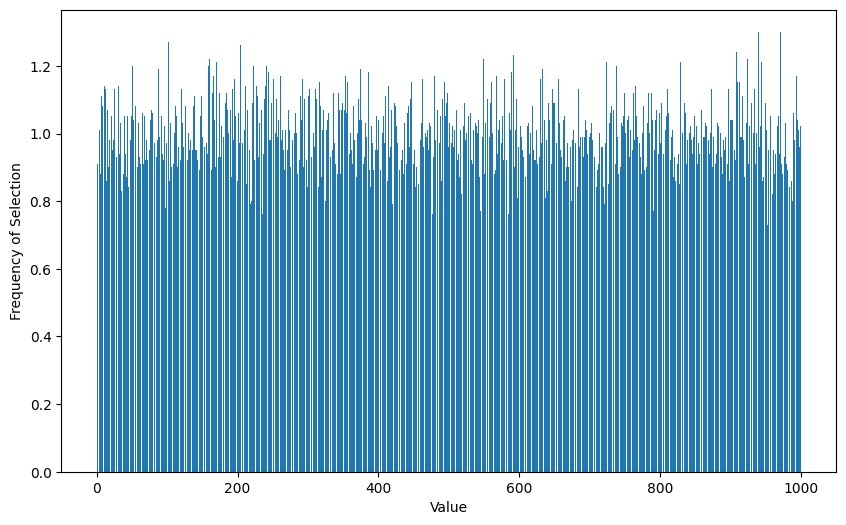

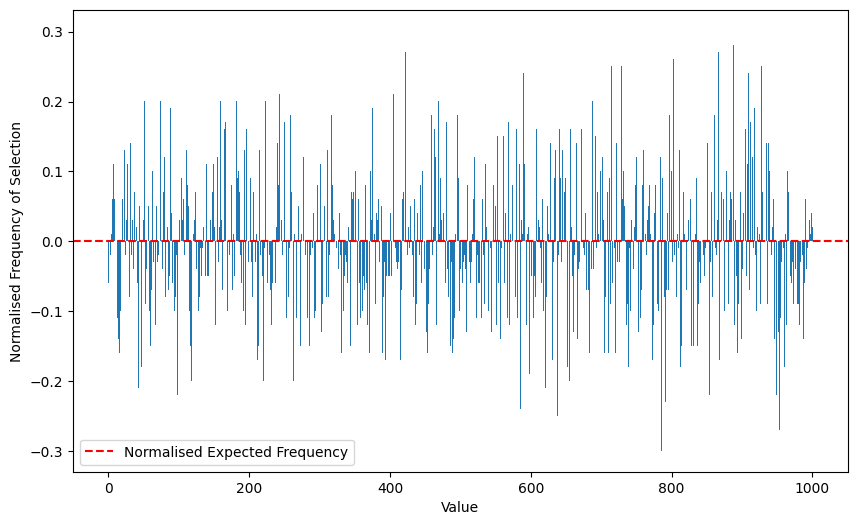

In [83]:
""" Test integer mapping, but for a large range 
"""
x_min = 0
x_max = 1000
n_numbers = x_max - x_min + 1
n_repeat = 100000

random_numbers = np.zeros(shape=n_numbers)
seed = int.from_bytes(os.urandom(16), 'big') 

for i in range(0, n_repeat):
    results = integer_mapping_m.random_integer_int32(x_min, x_max, seed)
    r = results.result
    random_numbers[r] += 1
    seed = results.args['seed']

plt.figure(figsize=(10, 6))
plt.bar(range(x_min, x_max + 1), (random_numbers *  n_numbers) / n_repeat)
plt.xlabel('Value')
plt.ylabel('Frequency of Selection')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(range(x_min, x_max + 1), ((random_numbers *  n_numbers) / n_repeat) - 1)
plt.xlabel('Value')
plt.axhline(y=0.0, color='r', linestyle='--', label=f'Normalised Expected Frequency') 
plt.legend()
plt.ylabel('Normalised Frequency of Selection')
plt.show()

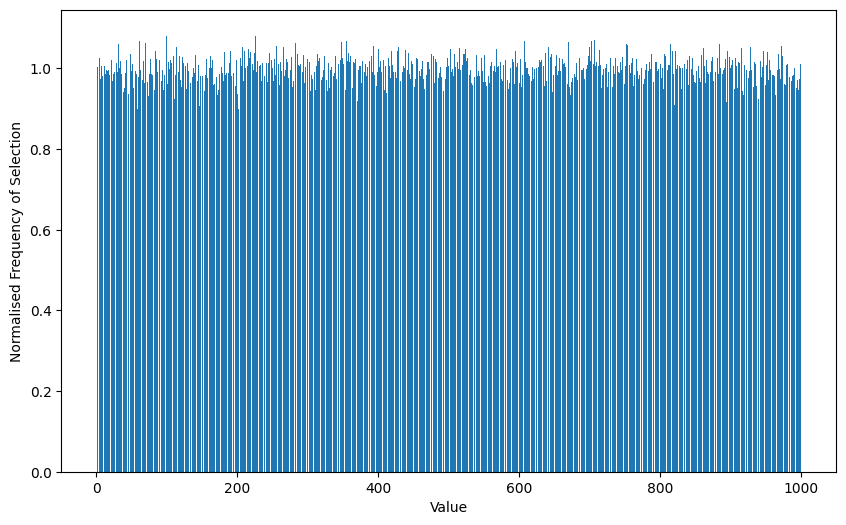

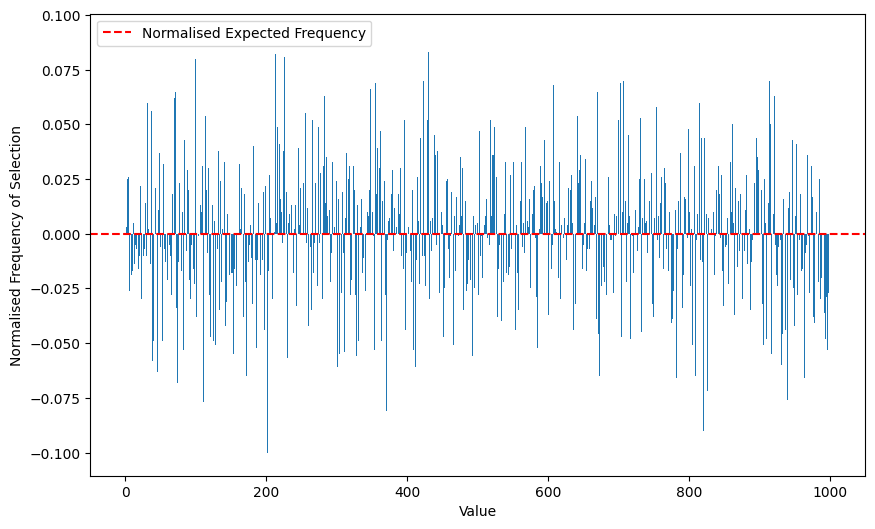

Top 10 values that deviate from the expected normalised value of 1.0:
58 0.993
201 0.937
146 1.002
711 0.978
820 1.0070000000000001
582 0.998
429 1.052
894 1.036
212 1.0010000000000001
225 1.038


In [85]:
""" Simple Reservoir Sampling

Routine is implemented to sample from [1, n_range], therefore we ignore the first element, 0, when processing
results in python (rather than doing a i - 1 mapping)
"""
reservoir_m = gf.fFort('../cmake-build/libisdff90.dylib', '../cmake-build/modules/reservoir_sampling_m.mod')

m_samples = 100
n_range = 1000
n_repeat = 10000
occurrences = np.zeros(shape=n_range+1)

for i in range(0, n_repeat):
    seeds = np.random.randint(0, 2**64, size=8, dtype=np.uint64)
    result = reservoir_m.reservoir_sampling(m_samples, n_range, np.empty(shape=(m_samples)), seed=seeds)
    # Fill counts
    for j in result.args['selected']:
        occurrences[j] += 1

# Uniform probability of getting each value
uniform_p = m_samples / n_range
normalize =  1. / (n_repeat * uniform_p)

plt.figure(figsize=(10, 6))
plt.bar(range(1, n_range + 1), occurrences[1:] * normalize)
plt.xlabel('Value')
plt.ylabel('Normalised Frequency of Selection')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(range(1, n_range + 1), (occurrences[1:] * normalize) - 1)
plt.xlabel('Value')
plt.axhline(y=0.0, color='r', linestyle='--', label=f'Normalised Expected Frequency') 
plt.legend()
plt.ylabel('Normalised Frequency of Selection')
plt.show()

print("Top 10 values that deviate from the expected normalised value of 1.0:")
indices = np.argsort(np.abs((occurrences[1:] * normalize) - 1))

for i in indices[-10:][::-1]:
    print(i, occurrences[i] * normalize)


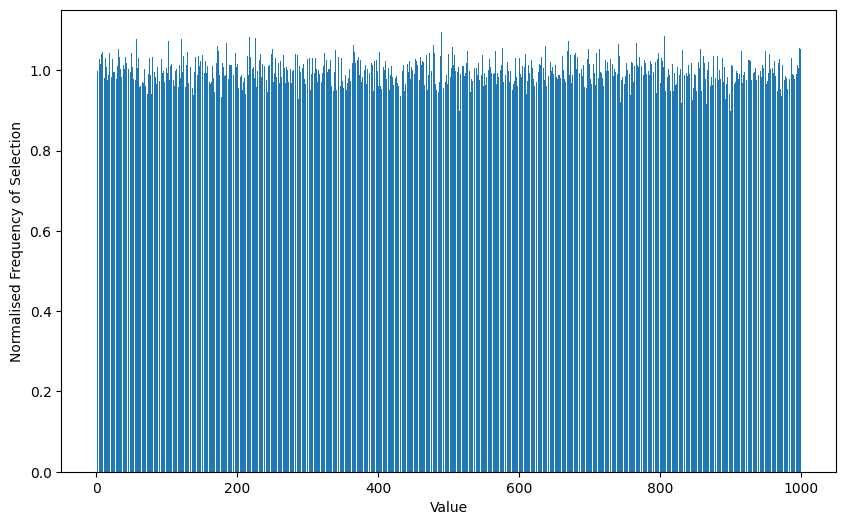

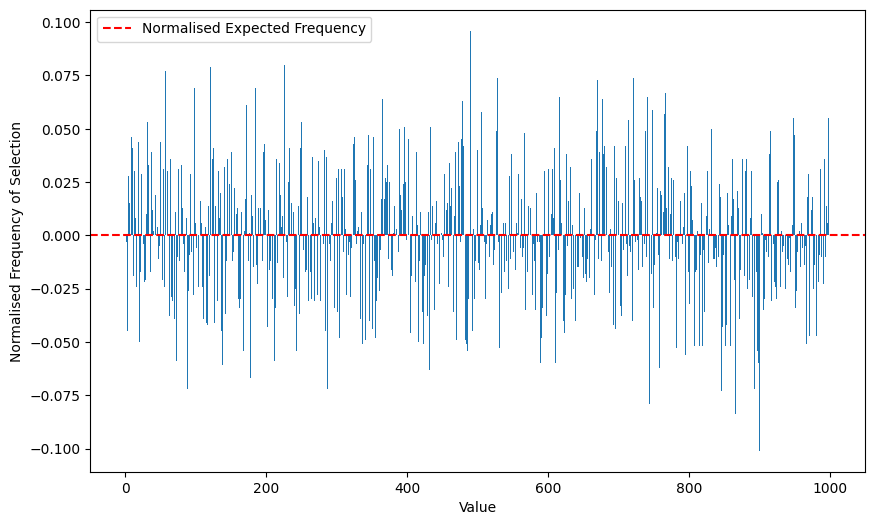

Top 10 values that deviate from the expected normalised value of 1.0:
899 0.9400000000000001
515 1.0210000000000001
489 1.036
653 0.982
145 1.036
806 0.97
217 1.03
865 0.979
707 0.993
768 1.0130000000000001


In [88]:
""" Reservoir Sampling using Algorithm L.

Routine is implemented to sample from [1, n_range], therefore we ignore the first element, 0, when processing
results in python (rather than doing a i - 1 mapping)
"""
reservoir_m = gf.fFort('../cmake-build/libisdff90.dylib', '../cmake-build/modules/reservoir_sampling_m.mod')

m_samples = 100
n_range = 1000
n_repeat = 10000
occurrences = np.zeros(shape=n_range+1)

for i in range(0, n_repeat):
    seeds = np.random.randint(0, 2**64, size=8, dtype=np.uint64)
    result = reservoir_m.reservoir_sampling_algorithml(m_samples, n_range, seeds, np.empty(shape=(m_samples)))
    # Fill counts
    for j in result.args['reservoir']:
        occurrences[j] += 1

# Uniform probability of getting each value
uniform_p = m_samples / n_range
normalize =  1. / (n_repeat * uniform_p)

plt.figure(figsize=(10, 6))
plt.bar(range(1, n_range + 1), occurrences[1:] * normalize)
plt.xlabel('Value')
plt.ylabel('Normalised Frequency of Selection')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(range(1, n_range + 1), (occurrences[1:] * normalize) - 1)
plt.xlabel('Value')
plt.axhline(y=0.0, color='r', linestyle='--', label=f'Normalised Expected Frequency') 
plt.legend()
plt.ylabel('Normalised Frequency of Selection')
plt.show()

print("Top 10 values that deviate from the expected normalised value of 1.0:")
indices = np.argsort(np.abs((occurrences[1:] * normalize) - 1))

for i in indices[-10:][::-1]:
    print(i, occurrences[i] * normalize)
